In [1]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# To Load dataset from local drive
from google.colab import files
uploaded = files.upload()

Saving clustering dataset1.csv to clustering dataset1.csv


In [3]:
# Importing the dataset
dataset = pd.read_csv('clustering dataset1.csv')
dataset

,Gender,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunction,Age
0,Male,148,72.0,35.0,0.0,33.6,0.627,50
1,Female,85,66.0,29.0,0.0,26.6,0.351,31
2,Female,183,64.0,0.0,0.0,23.3,0.672,32
3,Female,89,66.0,23.0,94.0,28.1,0.167,21
4,Male,137,NaN,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
559,Male,85,74.0,0.0,0.0,30.1,0.300,35
560,Male,125,76.0,0.0,0.0,33.8,0.121,54
561,Male,198,66.0,32.0,274.0,41.3,0.502,28
562,Male,87,68.0,34.0,77.0,37.6,0.401,24


In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
print(dataset)

     Gender  Glucose    BP  SkinThickness  Insulin   BMI  PedigreeFunction  Age
0      Male      148  72.0           35.0      0.0  33.6             0.627   50
1    Female       85  66.0           29.0      0.0  26.6             0.351   31
2    Female      183  64.0            0.0      0.0  23.3             0.672   32
3    Female       89  66.0           23.0     94.0  28.1             0.167   21
4      Male      137   NaN           35.0    168.0  43.1             2.288   33
..      ...      ...   ...            ...      ...   ...               ...  ...
559    Male       85  74.0            0.0      0.0  30.1             0.300   35
560    Male      125  76.0            0.0      0.0  33.8             0.121   54
561    Male      198  66.0           32.0    274.0  41.3             0.502   28
562    Male       87  68.0           34.0     77.0  37.6             0.401   24
563    Male       99  60.0           19.0     54.0  26.9             0.497   32

[564 rows x 8 columns]


In [6]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(564, 8)


In [7]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            564 non-null    object 
 1   Glucose           564 non-null    int64  
 2   BP                548 non-null    float64
 3   SkinThickness     553 non-null    float64
 4   Insulin           552 non-null    float64
 5   BMI               547 non-null    float64
 6   PedigreeFunction  546 non-null    float64
 7   Age               564 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 35.4+ KB


In [8]:
types = dataset.dtypes
print(types)

Gender               object
Glucose               int64
BP                  float64
SkinThickness       float64
Insulin             float64
BMI                 float64
PedigreeFunction    float64
Age                   int64
dtype: object


In [9]:
#Count total number of classes in Data
class_counts = dataset.groupby('Gender').size()
print(class_counts)

Gender
Female    247
Male      317
dtype: int64


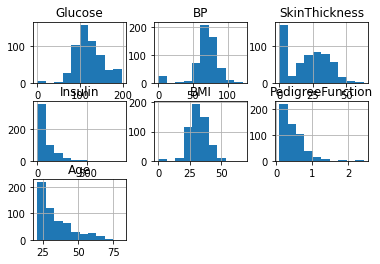

In [10]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

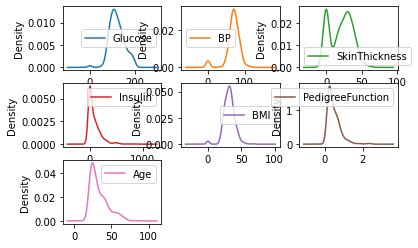

In [11]:
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [12]:
dataset.describe()

,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunction,Age
count,564.000000,548.000000,553.000000,552.000000,547.000000,546.000000,564.000000
mean,120.239362,68.768248,20.618445,80.009058,31.830896,0.481267,33.292553
std,32.763176,19.279507,15.628644,116.936865,8.111669,0.337244,11.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,64.000000,0.000000,0.000000,27.050000,0.248250,24.000000
50%,116.000000,70.000000,23.000000,37.500000,32.000000,0.388500,29.000000
75%,140.250000,78.500000,32.000000,120.500000,36.550000,0.646500,40.000000
max,198.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [13]:
# Extracting features of dataset

X = dataset.iloc[:,0:8].values



In [14]:
print(X)


[['Male' 148 72.0 ... 33.6 0.627 50]
 ['Female' 85 66.0 ... 26.6 0.35100000000000003 31]
 ['Female' 183 64.0 ... 23.3 0.672 32]
 ...
 ['Male' 198 66.0 ... 41.3 0.502 28]
 ['Male' 87 68.0 ... 37.6 0.401 24]
 ['Male' 99 60.0 ... 26.9 0.49700000000000005 32]]


In [15]:
# Taking care of missing data
#handling missing data (Replacing missing data with the mean value)  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NaN, strategy= 'mean', fill_value=None, verbose=1, copy=True)
#Fitting imputer object to the independent variables x.   
imputer = imputer.fit(X[:,2:7]) 
#Replacing missing data with the calculated mean value  
X[:,2:7]= imputer.transform(X[:,2:7])  

In [17]:
dataframe=pd.DataFrame(X,columns=['Gender','Glucose','BP','SkinThickness','Insulin','BMI','PedigreeFunction','Age'])
dataframe.isnull().sum()

Gender              0
Glucose             0
BP                  0
SkinThickness       0
Insulin             0
BMI                 0
PedigreeFunction    0
Age                 0
dtype: int64

In [18]:
# Encoding Categorical data:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [19]:
print(X)

[[1 148 72.0 ... 33.6 0.627 50]
 [0 85 66.0 ... 26.6 0.35100000000000003 31]
 [0 183 64.0 ... 23.3 0.672 32]
 ...
 [1 198 66.0 ... 41.3 0.502 28]
 [1 87 68.0 ... 37.6 0.401 24]
 [1 99 60.0 ... 26.9 0.49700000000000005 32]]


In [20]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

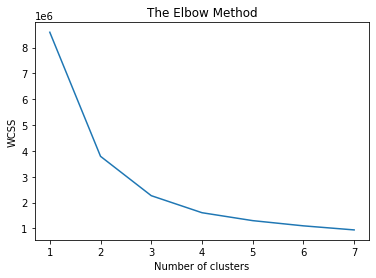

In [21]:
plt.plot(range(1, 8), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Fitting K-Means to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


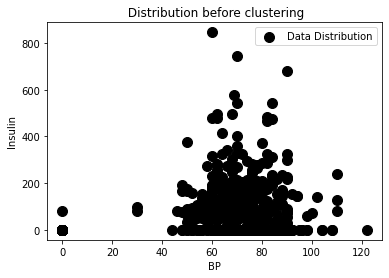

In [23]:
# Visualising the clusters
plt.scatter(X[:,2], X[:,4], s = 100, c = 'black', label = 'Data Distribution')
plt.title(' Distribution before clustering')
plt.xlabel('BP')
plt.ylabel('Insulin')
plt.legend()
plt.show()

In [24]:
frame = pd.DataFrame(X)
frame['cluster'] = y_hc
frame['cluster'].value_counts()

1    442
0    122
Name: cluster, dtype: int64

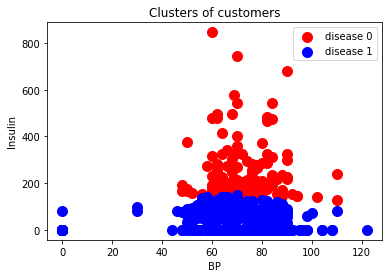

In [25]:
plt.scatter(X[y_hc == 0, 2], X[y_hc == 0, 4], s = 100, c = 'red', label = 'disease 0')
plt.scatter(X[y_hc == 1, 2], X[y_hc == 1, 4], s = 100, c = 'blue', label = 'disease 1')
plt.title('Clusters of customers')
plt.xlabel('BP')
plt.ylabel('Insulin')
plt.legend()
plt.show()

In [26]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(kmeans) 
  
# Load the pickled model 
Saved_Model = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
Saved_Model.predict(X)

array([5, 3, 5, 0, 6, 3, 0, 3, 4, 5, 3, 5, 5, 2, 6, 3, 1, 3, 0, 0, 1, 3,
       5, 3, 6, 0, 5, 6, 0, 3, 3, 1, 0, 3, 3, 6, 5, 3, 3, 6, 0, 5, 3, 1,
       5, 5, 5, 3, 3, 3, 0, 3, 3, 1, 1, 3, 1, 0, 5, 6, 3, 5, 3, 0, 3, 3,
       3, 3, 3, 0, 0, 6, 0, 1, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 5, 0, 3, 0,
       0, 3, 3, 6, 0, 5, 0, 0, 3, 0, 0, 6, 5, 5, 5, 3, 3, 6, 3, 6, 3, 3,
       6, 4, 3, 3, 0, 5, 5, 3, 3, 0, 0, 3, 0, 5, 3, 0, 6, 0, 6, 3, 6, 3,
       1, 3, 0, 6, 0, 0, 5, 1, 5, 3, 0, 3, 1, 3, 3, 0, 5, 3, 6, 3, 6, 4,
       5, 5, 0, 6, 0, 6, 5, 0, 1, 3, 5, 6, 5, 3, 3, 0, 3, 6, 3, 0, 0, 6,
       3, 6, 5, 5, 3, 0, 3, 3, 5, 5, 4, 0, 0, 6, 3, 0, 5, 5, 3, 6, 3, 0,
       0, 1, 3, 5, 3, 0, 6, 3, 1, 5, 0, 5, 3, 5, 5, 6, 6, 1, 6, 0, 3, 3,
       4, 5, 3, 6, 0, 3, 3, 5, 2, 0, 5, 1, 3, 3, 0, 5, 6, 5, 5, 3, 3, 0,
       5, 6, 6, 5, 3, 2, 4, 3, 3, 5, 0, 3, 1, 3, 3, 3, 1, 6, 6, 5, 3, 5,
       3, 0, 5, 3, 3, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 5, 6, 6, 5, 3, 0,
       4, 6, 0, 0, 3, 0, 6, 6, 5, 6, 1, 6, 6, 3, 5,

In [28]:
import joblib
filename = '/content/drive/My Drive/pjmt2.sav'
joblib.dump(kmeans, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)


In [29]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(kmeans,open('/content/drive/My Drive/pjmt2.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [30]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/pjmt2.pkl','rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X)

array([5, 3, 5, 0, 6, 3, 0, 3, 4, 5, 3, 5, 5, 2, 6, 3, 1, 3, 0, 0, 1, 3,
       5, 3, 6, 0, 5, 6, 0, 3, 3, 1, 0, 3, 3, 6, 5, 3, 3, 6, 0, 5, 3, 1,
       5, 5, 5, 3, 3, 3, 0, 3, 3, 1, 1, 3, 1, 0, 5, 6, 3, 5, 3, 0, 3, 3,
       3, 3, 3, 0, 0, 6, 0, 1, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 5, 0, 3, 0,
       0, 3, 3, 6, 0, 5, 0, 0, 3, 0, 0, 6, 5, 5, 5, 3, 3, 6, 3, 6, 3, 3,
       6, 4, 3, 3, 0, 5, 5, 3, 3, 0, 0, 3, 0, 5, 3, 0, 6, 0, 6, 3, 6, 3,
       1, 3, 0, 6, 0, 0, 5, 1, 5, 3, 0, 3, 1, 3, 3, 0, 5, 3, 6, 3, 6, 4,
       5, 5, 0, 6, 0, 6, 5, 0, 1, 3, 5, 6, 5, 3, 3, 0, 3, 6, 3, 0, 0, 6,
       3, 6, 5, 5, 3, 0, 3, 3, 5, 5, 4, 0, 0, 6, 3, 0, 5, 5, 3, 6, 3, 0,
       0, 1, 3, 5, 3, 0, 6, 3, 1, 5, 0, 5, 3, 5, 5, 6, 6, 1, 6, 0, 3, 3,
       4, 5, 3, 6, 0, 3, 3, 5, 2, 0, 5, 1, 3, 3, 0, 5, 6, 5, 5, 3, 3, 0,
       5, 6, 6, 5, 3, 2, 4, 3, 3, 5, 0, 3, 1, 3, 3, 3, 1, 6, 6, 5, 3, 5,
       3, 0, 5, 3, 3, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 5, 6, 6, 5, 3, 0,
       4, 6, 0, 0, 3, 0, 6, 6, 5, 6, 1, 6, 6, 3, 5,

In [31]:
!pip install streamlit

     |████████████████████████████████| 7.8MB 24.3MB/s 
     |████████████████████████████████| 174kB 44.2MB/s 
     |████████████████████████████████| 112kB 37.8MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 4.2MB 28.6MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 122kB 50.8MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=c3afb9a07e8e4c6bd2654ddf634d4768311742c3433aed81f9599add6e597335
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: ipykernel 6.0.1 has requirement ipython>=7.23.1, but you'll have ipython 5.5.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
  Found existing installation: importlib-metadata 4.5.0
    Uninstalling importlib-metadata-4.5.0:
     

In [32]:
!pip install pyngrok

     |████████████████████████████████| 747kB 31.0MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=1b2cabe6e93b7ba133ad20144885abde6a5c18e09d2207725b957ead75cf3a22
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [33]:
!ngrok authtoken 1rchx51OwTA2nzqkxMNeZXVHIeW_5FQEeWkR62XsYtqygMwwe

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [36]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
pickle_in = open("/content/drive/My Drive/pjmt2.pkl","rb")
model=pickle.load(pickle_in)
dataset= pd.read_csv('/content/drive/My Drive/clustering dataset1.csv')
X = dataset.iloc[:,0:8].values

# Taking care of missing data
#handling missing data (Replacing missing data with the mean value)  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NaN, strategy= 'mean', fill_value=None, verbose=1, copy=True)
#Fitting imputer object to the independent variables x.   
imputer = imputer.fit(X[:,2:7]) 
#Replacing missing data with the calculated mean value  
X[:,2:7]= imputer.transform(X[:,2:7])  


# Encoding Categorical data:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:,0])



from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

def predict_note_authentication(Gender,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunction,Age):
  output= model.predict([[Gender,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunction,Age]])
  print("Disease Category is",output)
  if output==[0]:
    prediction="Disease Category is 0"
  else:
    prediction="Disease Category is 1"
  print(prediction)
  return prediction
def main():
    
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;">Deep Learning  Lab Experiment Deployment</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.header("Item Purchase Prediction")
    Age = st.number_input('Insert a Age',18,60)
    Glucose = st.number_input('Insert a Glucose',0,200)
    BP= st.number_input('Insert a BP',80,120)
    SkinThickness = st.number_input('Insert a SkinThickness',0,100)
    Insulin = st.number_input('Insert aInsulin',0,300)
    Gender = st.number_input('Insert 0 for Male 1 for Female',0,1)
    BMI= st.number_input('Insert BMI',10,50)
    PedigreeFunction= st.number_input('Insert a PedigreeFunction')
    
    resul=""
    if st.button("Predict"):
      result=predict_note_authentication(Gender,Glucose,BP,SkinThickness,Insulin,BMI,PedigreeFunction,Age)
      st.success('Model has predicted {}'.format(result))
    if st.button("About"):
      st.subheader("Developed by Ishika Jain")
      st.subheader("B-Section,PIET")

if __name__=='__main__':
  main()
   

Overwriting app.py


In [37]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [40]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://c25d10668dad.ngrok.io" -> "http://localhost:80">

In [41]:
!streamlit run --server.port 80 app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.245.58.181:80

  Stopping...
  Stopping...
